In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Sample data with categorical variables
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Size': ['Small', 'Large', 'Medium', 'Small', 'Large']
})

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[['Color', 'Size']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(encoded_data)

# Add cluster labels to the original data
data['Cluster'] = clusters

print(data)


   Color    Size  Cluster
0    Red   Small        0
1   Blue   Large        1
2  Green  Medium        0
3    Red   Small        0
4   Blue   Large        1


/home/francis/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/francis/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
data.describe()

,Cluster
count,5.000000
mean,0.400000
std,0.547723
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 441, ncost: 1139.243311715272
Run: 1, iteration: 2/20, moves: 13, ncost: 1138.7626105402794
Run: 1, iteration: 3/20, moves: 2, ncost: 1138.6759697346904
Run: 1, iteration: 4/20, moves: 0, ncost: 1138.6759697346904
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 430, ncost: 1099.9431151026743
Run: 2, iteration: 2/20, moves: 20, ncost: 1031.087109713857
Run: 2, iteration: 3/20, moves: 8, ncost: 945.6733955205221
Run: 2, iteration: 4/20, moves: 3, ncost: 913.7965610139067
Run: 2, iteration: 5/20, moves: 0, ncost: 913.7965610139067
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 5, ncost: 945.0360914624088
Run: 3, iteration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


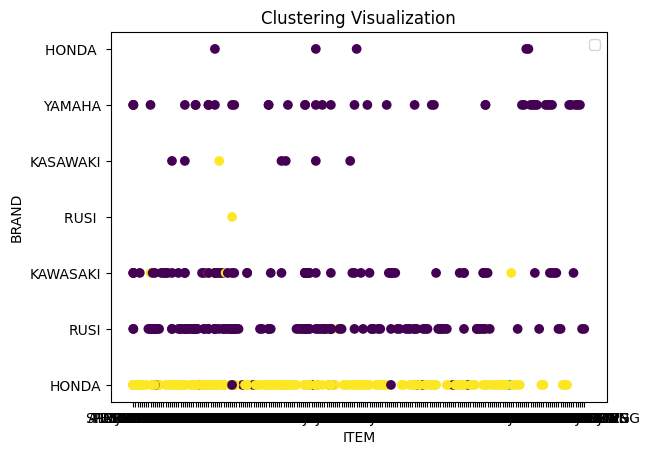

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes

marketing_df = pd.read_csv('dataset.csv')

# Drop a single column
marketing_df = marketing_df.drop('ID', axis='columns')

marketing_df['QUANTITY'].fillna(1, inplace=True)  # Fill missing values with 0

mark_array = marketing_df.values 

kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical = [0, 1, 2, 4, 5])

cluster_dict = []
for c in clusters:
    cluster_dict.append(c)

marketing_df['cluster'] = cluster_dict

marketing_df[marketing_df['cluster']== 0].head(10)

# plt.xlim(0, 150)
# plt.ylim(0, 25)

plt.scatter(marketing_df['ITEM'], marketing_df['BRAND'], c=marketing_df['cluster'], cmap='viridis')
plt.xlabel('ITEM')
plt.ylabel('BRAND')
plt.title('Clustering Visualization')
plt.legend()
# plt.grid(True)
plt.show()

In [12]:
# Find the highest and lowest prices
highest_price = marketing_df['DATE'].max()
lowest_price = marketing_df['DATE'].min()

# Print the results
print("Highest Price:", highest_price)
print("Lowest Price:", lowest_price)

# Calculate the length from min to max
price_range_length = int(highest_price) - int(lowest_price)

# Print the length
print("Length from Min to Max Price:", price_range_length)


Highest Price: 03/09/2023
Lowest Price: 01/03/2023


ValueError: invalid literal for int() with base 10: '03/09/2023'

TypeError: list indices must be integers or slices, not list

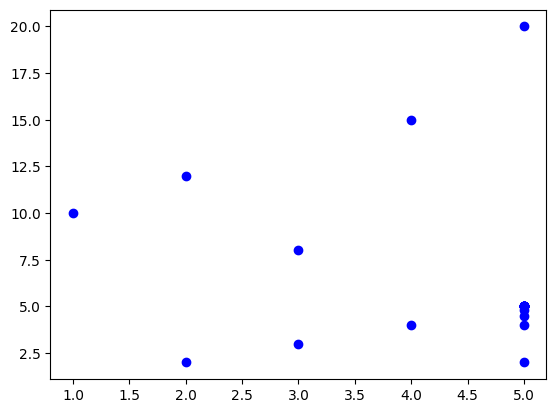

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5]
y = [10, 12, 8, 15, 20, 5, 5, 5, 4.5, 4,2, 4.8, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5]

# Create the scatter plot
plt.scatter(x, y, c='blue', marker='o', label='Data Points')

# Find the highest and lowest prices
hx = x[x].max()
lx = x[x].min()

# Find the highest and lowest prices
hy = marketing_df['y'].may()
ly = marketing_df['y'].miy()

print(hx)
print(lx)

# Set x and y-axis limits
# plt.xlim(lx, hx)
plt.ylim(0, 50)

# Customize the plot
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
